In [1]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.7 MB/s eta 0:00:00


In [2]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.0 MB/s eta 0:00:00


In [3]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 4.5 MB/s eta 0:00:00


<h1>Sentiment Analysis Application Genshin Impact</h1>

<h3>Sentiment analysis on Genshin Impact involves using natural language processing techniques to evaluate players’ opinions and emotions expressed in the playstore. This process helps identify whether the community’s feedback is generally positive, negative, or neutral regarding game updates, characters, events, and overall gameplay. The insights can guide developers in improving the player experience and understanding community trends.</h3>

In [4]:
#lib
import string
import re
import csv
import requests
import emoji
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from google_play_scraper import app, Sort, reviews_all, reviews

from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:
seed=0
np.random.seed(seed)

pd.options.mode.chained_assignment = None

In [6]:
scrap = reviews_all(
    'com.miHoYo.GenshinImpact',
    lang = 'id',
    country = 'id',
    sort = Sort.NEWEST,
)

In [7]:
scrap_review_df = pd.DataFrame(scrap)
scrap_review_df.to_csv('review_genshin.csv', index = False)
scrap_review_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,6bcbe73d-7034-40b7-8cc7-66faf67fb131,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tolong dong adain tombol skip, ganggu gw bikin...",1,0,None,2025-04-07 03:04:09,None,NaT,None
1,ffb32fb5-6a98-4935-920f-475b5413468a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,udah kasih bukti2 ke email maaf akun game kamu...,1,0,None,2025-04-07 02:41:19,None,NaT,None
2,905e853a-0dcd-4cd3-95c7-1fc29412f417,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Battle monoton, cerita mid dan terlalu banyak ...",1,1,None,2025-04-07 02:35:50,None,NaT,None
3,892c9741-8b7c-417f-bcb3-f84f93fa7e18,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,semoga aku bisa mainin game ini kalo sudah gan...,5,0,None,2025-04-07 02:35:33,None,NaT,None
4,713a4c4d-b537-402e-a919-7cf3e1cbb150,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Menurutku ini udah bagus.,5,0,5.4.0_30057195_30231699,2025-04-07 02:30:26,None,NaT,5.4.0_30057195_30231699
...,...,...,...,...,...,...,...,...,...,...,...
216064,23cd0247-8802-4d55-b46a-6993c4852a36,Luxuria,https://play-lh.googleusercontent.com/a/ACg8oc...,"Saya sangat menantikan game ini, semoga saya b...",5,1,None,2020-09-27 04:18:03,None,NaT,None
216065,119af6ce-01bb-47e7-b9ab-45cafc0c40a5,Ramato Ayurigo,https://play-lh.googleusercontent.com/a-/ALV-U...,Wah gamenya bagus banget Udh open world grafik...,5,2,None,2020-09-27 04:15:15,None,NaT,None
216066,fcfd1ba4-47bb-4b48-ac55-348e3940f3a6,Fisko Aritmatika Yuri,https://play-lh.googleusercontent.com/a-/ALV-U...,Xixixi,5,1,None,2020-09-27 04:14:24,None,NaT,None
216067,fe007972-d9a6-4b15-aa22-fff75dae0b28,Muhammad Fahriza Yuda Rianto,https://play-lh.googleusercontent.com/a-/ALV-U...,Owh,5,1,None,2020-09-27 04:13:32,None,NaT,None


In [8]:
scrap_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216069 entries, 0 to 216068
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              216069 non-null  object        
 1   userName              216069 non-null  object        
 2   userImage             216069 non-null  object        
 3   content               216069 non-null  object        
 4   score                 216069 non-null  int64         
 5   thumbsUpCount         216069 non-null  int64         
 6   reviewCreatedVersion  139583 non-null  object        
 7   at                    216069 non-null  datetime64[ns]
 8   replyContent          14363 non-null   object        
 9   repliedAt             14363 non-null   datetime64[ns]
 10  appVersion            139583 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 18.1+ MB


In [9]:
scrap_review_df.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,76486
at,0
replyContent,201706
repliedAt,201706


In [10]:
rep_con = scrap_review_df[['replyContent']].nunique()
rep_at = scrap_review_df[['repliedAt']].nunique()

print(rep_con)
print(rep_at)

replyContent    111
dtype: int64
repliedAt    14283
dtype: int64


In [11]:
df_cleaned_raw = scrap_review_df.drop(['replyContent', 'repliedAt', 'userImage'], axis=1).dropna()
df_cleaned_raw = df_cleaned_raw.drop_duplicates()
df_cleaned_raw

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
4,713a4c4d-b537-402e-a919-7cf3e1cbb150,Pengguna Google,Menurutku ini udah bagus.,5,0,5.4.0_30057195_30231699,2025-04-07 02:30:26,5.4.0_30057195_30231699
5,f0c79417-9334-4bf1-bca6-086c57240798,Pengguna Google,Minusnya resource seret.,3,0,5.4.0_30057195_30231699,2025-04-07 02:28:28,5.4.0_30057195_30231699
6,f57f0768-3d07-48d3-b883-1c4a15f2a6c3,Pengguna Google,game nya bagus banyak yang suka sayangnya kada...,5,0,5.5.0_31400259_31451966,2025-04-07 02:13:02,5.5.0_31400259_31451966
7,b604dfc7-8986-4562-96c6-86fc3fc0569d,Pengguna Google,seru banget,5,0,5.5.0_31400259_31451966,2025-04-07 01:17:09,5.5.0_31400259_31451966
8,367cf423-f24e-489c-848d-d6648b841952,Pengguna Google,"terimakasih sudah tidak kikir,semoga makin ban...",5,1,5.5.0_31400259_31451966,2025-04-07 01:12:54,5.5.0_31400259_31451966
...,...,...,...,...,...,...,...,...
216037,3f7f8ab4-e7f7-42a5-a6d2-468c6bfa5cfc,Iskandar Zulkarnaen,Game Anike bagus,5,0,1.0.0_1112729_1135452,2020-09-27 04:35:41,1.0.0_1112729_1135452
216042,68cabe23-14bc-4771-be24-85f0035625fb,Muhammad Abyan Tsabit Amani,Game nya sangat mantap sekali,5,2,1.0.0_1112729_1135452,2020-09-27 04:31:21,1.0.0_1112729_1135452
216048,a697bff7-22e3-4ce0-a509-5a40d5781663,Akunnah Cobaan,Last go!!,5,2,1.0.0_1112729_1135452,2020-09-27 04:28:29,1.0.0_1112729_1135452
216051,08c3b047-a6a8-463b-80a9-db212e8c8716,Edwin Jhon,"Mihoyo, Otaku technologi Save the world 😎🔥",5,1,1.0.0_1112729_1135452,2020-09-27 04:28:07,1.0.0_1112729_1135452


In [12]:
df_cleaned_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139583 entries, 4 to 216053
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              139583 non-null  object        
 1   userName              139583 non-null  object        
 2   content               139583 non-null  object        
 3   score                 139583 non-null  int64         
 4   thumbsUpCount         139583 non-null  int64         
 5   reviewCreatedVersion  139583 non-null  object        
 6   at                    139583 non-null  datetime64[ns]
 7   appVersion            139583 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 9.6+ MB


In [13]:
# @title
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin", "kikir" : "pelit"}

In [14]:
#preprocessing

def cleaningTXT(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#[A-Za-z0-9]+', '', text)
  text = re.sub(r'RT[\s]', '', text)
  text = re.sub(r"http\S+", '', text)
  text = re.sub(r'[0-9]+', '', text)
  text = emoji.replace_emoji(text, replace=' emoji ')
  text = re.sub(r'[^\w\s]', '', text)
  text = text.replace('\n', ' ')
  text = text.translate(str.maketrans('', '', string.punctuation))
  text = ' '.join(text.strip().split())

  return text

def casefold(text):
  text = text.lower()
  return text

def tokenizeTXT(text):
  text = word_tokenize(text)
  return text

def filteringTXT(text):
  stopwordsID = set(stopwords.words('indonesian'))
  stopwordsEN = set(stopwords.words('english'))

  stopwordsID.update(stopwordsEN)
  stopwordsID.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy", "wkwk"])

  filtered = []

  for word in text:
    if word not in stopwordsID:
      filtered.append(word)
  text = filtered
  return text

def stemmingTXT(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  words = text.split()

  stem_word = [stemmer.stem(word) for word in words ]
  stem_text = ' '.join(stem_word)
  text = stem_text
  return text

def slangTXT(text):
  words = text.split()
  fix = []

  for word in words:
    if word.lower() in slangwords:
      fix.append(slangwords[word.lower()])
    else:
      fix.append(word)
  text = ' '.join(fix)
  return text

def sentenced(words):
  sentence = ' '.join(word for word in words)
  return sentence

In [15]:
df_cleaned = df_cleaned_raw
df_cleaned['cleaned_content'] = df_cleaned['content'].apply(cleaningTXT)
df_cleaned['cleaned_lowercase'] = df_cleaned['cleaned_content'].apply(casefold)
df_cleaned['slangwords_content'] = df_cleaned['cleaned_lowercase'].apply(slangTXT)
df_cleaned['tokenized_content'] = df_cleaned['slangwords_content'].apply(tokenizeTXT)
df_cleaned['stopwords_content'] = df_cleaned['tokenized_content'].apply(filteringTXT)
df_cleaned['final_content'] = df_cleaned['stopwords_content'].apply(sentenced)
df_cleaned.dropna()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,cleaned_content,cleaned_lowercase,slangwords_content,tokenized_content,stopwords_content,final_content
4,713a4c4d-b537-402e-a919-7cf3e1cbb150,Pengguna Google,Menurutku ini udah bagus.,5,0,5.4.0_30057195_30231699,2025-04-07 02:30:26,5.4.0_30057195_30231699,Menurutku ini udah bagus,menurutku ini udah bagus,menurutku ini sudah bagus,"[menurutku, ini, sudah, bagus]","[menurutku, bagus]",menurutku bagus
5,f0c79417-9334-4bf1-bca6-086c57240798,Pengguna Google,Minusnya resource seret.,3,0,5.4.0_30057195_30231699,2025-04-07 02:28:28,5.4.0_30057195_30231699,Minusnya resource seret,minusnya resource seret,minusnya resource seret,"[minusnya, resource, seret]","[minusnya, resource, seret]",minusnya resource seret
6,f57f0768-3d07-48d3-b883-1c4a15f2a6c3,Pengguna Google,game nya bagus banyak yang suka sayangnya kada...,5,0,5.5.0_31400259_31451966,2025-04-07 02:13:02,5.5.0_31400259_31451966,game nya bagus banyak yang suka sayangnya kada...,game nya bagus banyak yang suka sayangnya kada...,game nya bagus banyak yang suka sayangnya kada...,"[game, nya, bagus, banyak, yang, suka, sayangn...","[game, bagus, suka, sayangnya, kadang, kadang,...",game bagus suka sayangnya kadang kadang suka n...
7,b604dfc7-8986-4562-96c6-86fc3fc0569d,Pengguna Google,seru banget,5,0,5.5.0_31400259_31451966,2025-04-07 01:17:09,5.5.0_31400259_31451966,seru banget,seru banget,seru banget,"[seru, banget]","[seru, banget]",seru banget
8,367cf423-f24e-489c-848d-d6648b841952,Pengguna Google,"terimakasih sudah tidak kikir,semoga makin ban...",5,1,5.5.0_31400259_31451966,2025-04-07 01:12:54,5.5.0_31400259_31451966,terimakasih sudah tidak kikirsemoga makin bany...,terimakasih sudah tidak kikirsemoga makin bany...,terimakasih sudah tidak kikirsemoga makin bany...,"[terimakasih, sudah, tidak, kikirsemoga, makin...","[terimakasih, kikirsemoga, bansos, grafiknya, ...",terimakasih kikirsemoga bansos grafiknya keren...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216037,3f7f8ab4-e7f7-42a5-a6d2-468c6bfa5cfc,Iskandar Zulkarnaen,Game Anike bagus,5,0,1.0.0_1112729_1135452,2020-09-27 04:35:41,1.0.0_1112729_1135452,Game Anike bagus,game anike bagus,game anike bagus,"[game, anike, bagus]","[game, anike, bagus]",game anike bagus
216042,68cabe23-14bc-4771-be24-85f0035625fb,Muhammad Abyan Tsabit Amani,Game nya sangat mantap sekali,5,2,1.0.0_1112729_1135452,2020-09-27 04:31:21,1.0.0_1112729_1135452,Game nya sangat mantap sekali,game nya sangat mantap sekali,game nya sangat mantap sekali,"[game, nya, sangat, mantap, sekali]","[game, mantap]",game mantap
216048,a697bff7-22e3-4ce0-a509-5a40d5781663,Akunnah Cobaan,Last go!!,5,2,1.0.0_1112729_1135452,2020-09-27 04:28:29,1.0.0_1112729_1135452,Last go,last go,last go,"[last, go]","[last, go]",last go
216051,08c3b047-a6a8-463b-80a9-db212e8c8716,Edwin Jhon,"Mihoyo, Otaku technologi Save the world 😎🔥",5,1,1.0.0_1112729_1135452,2020-09-27 04:28:07,1.0.0_1112729_1135452,Mihoyo Otaku technologi Save the world emoji e...,mihoyo otaku technologi save the world emoji e...,mihoyo otaku technologi save the world emoji e...,"[mihoyo, otaku, technologi, save, the, world, ...","[mihoyo, otaku, technologi, save, world, emoji...",mihoyo otaku technologi save world emoji emoji


In [16]:
df_cleaned

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,cleaned_content,cleaned_lowercase,slangwords_content,tokenized_content,stopwords_content,final_content
4,713a4c4d-b537-402e-a919-7cf3e1cbb150,Pengguna Google,Menurutku ini udah bagus.,5,0,5.4.0_30057195_30231699,2025-04-07 02:30:26,5.4.0_30057195_30231699,Menurutku ini udah bagus,menurutku ini udah bagus,menurutku ini sudah bagus,"[menurutku, ini, sudah, bagus]","[menurutku, bagus]",menurutku bagus
5,f0c79417-9334-4bf1-bca6-086c57240798,Pengguna Google,Minusnya resource seret.,3,0,5.4.0_30057195_30231699,2025-04-07 02:28:28,5.4.0_30057195_30231699,Minusnya resource seret,minusnya resource seret,minusnya resource seret,"[minusnya, resource, seret]","[minusnya, resource, seret]",minusnya resource seret
6,f57f0768-3d07-48d3-b883-1c4a15f2a6c3,Pengguna Google,game nya bagus banyak yang suka sayangnya kada...,5,0,5.5.0_31400259_31451966,2025-04-07 02:13:02,5.5.0_31400259_31451966,game nya bagus banyak yang suka sayangnya kada...,game nya bagus banyak yang suka sayangnya kada...,game nya bagus banyak yang suka sayangnya kada...,"[game, nya, bagus, banyak, yang, suka, sayangn...","[game, bagus, suka, sayangnya, kadang, kadang,...",game bagus suka sayangnya kadang kadang suka n...
7,b604dfc7-8986-4562-96c6-86fc3fc0569d,Pengguna Google,seru banget,5,0,5.5.0_31400259_31451966,2025-04-07 01:17:09,5.5.0_31400259_31451966,seru banget,seru banget,seru banget,"[seru, banget]","[seru, banget]",seru banget
8,367cf423-f24e-489c-848d-d6648b841952,Pengguna Google,"terimakasih sudah tidak kikir,semoga makin ban...",5,1,5.5.0_31400259_31451966,2025-04-07 01:12:54,5.5.0_31400259_31451966,terimakasih sudah tidak kikirsemoga makin bany...,terimakasih sudah tidak kikirsemoga makin bany...,terimakasih sudah tidak kikirsemoga makin bany...,"[terimakasih, sudah, tidak, kikirsemoga, makin...","[terimakasih, kikirsemoga, bansos, grafiknya, ...",terimakasih kikirsemoga bansos grafiknya keren...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216037,3f7f8ab4-e7f7-42a5-a6d2-468c6bfa5cfc,Iskandar Zulkarnaen,Game Anike bagus,5,0,1.0.0_1112729_1135452,2020-09-27 04:35:41,1.0.0_1112729_1135452,Game Anike bagus,game anike bagus,game anike bagus,"[game, anike, bagus]","[game, anike, bagus]",game anike bagus
216042,68cabe23-14bc-4771-be24-85f0035625fb,Muhammad Abyan Tsabit Amani,Game nya sangat mantap sekali,5,2,1.0.0_1112729_1135452,2020-09-27 04:31:21,1.0.0_1112729_1135452,Game nya sangat mantap sekali,game nya sangat mantap sekali,game nya sangat mantap sekali,"[game, nya, sangat, mantap, sekali]","[game, mantap]",game mantap
216048,a697bff7-22e3-4ce0-a509-5a40d5781663,Akunnah Cobaan,Last go!!,5,2,1.0.0_1112729_1135452,2020-09-27 04:28:29,1.0.0_1112729_1135452,Last go,last go,last go,"[last, go]","[last, go]",last go
216051,08c3b047-a6a8-463b-80a9-db212e8c8716,Edwin Jhon,"Mihoyo, Otaku technologi Save the world 😎🔥",5,1,1.0.0_1112729_1135452,2020-09-27 04:28:07,1.0.0_1112729_1135452,Mihoyo Otaku technologi Save the world emoji e...,mihoyo otaku technologi save the world emoji e...,mihoyo otaku technologi save the world emoji e...,"[mihoyo, otaku, technologi, save, the, world, ...","[mihoyo, otaku, technologi, save, world, emoji...",mihoyo otaku technologi save world emoji emoji


In [17]:
#labeling
def fetching(dictionaries):
  if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter = ',')
    for row in reader:
      dictionaries[row[0]] = int(row[1])
  else:
    print('failed')

#dari github
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
lexicon_pos = dict()
fetching(lexicon_pos)

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
lexicon_neg = dict()
fetching(lexicon_neg)

In [18]:
# sentiment analysis
def sentiment(text):
  score =0
  for word in text:
    if (word in lexicon_pos):
      score += lexicon_pos[word]
    elif(word in lexicon_neg):
      score += lexicon_neg[word]
    else:
      score +=0

  polarity = ''
  if score >=0 :
    polarity = 'positive'
  elif score < 0:
    polarity = 'negative'
  else :
    polarity = 'neutral'

  return score, polarity

In [19]:
results = df_cleaned['stopwords_content'].apply(sentiment)
results = list(zip(*results))
df_cleaned['score_polarity'] = results[0]
df_cleaned['polarity'] = results[1]
df_cleaned

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,cleaned_content,cleaned_lowercase,slangwords_content,tokenized_content,stopwords_content,final_content,score_polarity,polarity
4,713a4c4d-b537-402e-a919-7cf3e1cbb150,Pengguna Google,Menurutku ini udah bagus.,5,0,5.4.0_30057195_30231699,2025-04-07 02:30:26,5.4.0_30057195_30231699,Menurutku ini udah bagus,menurutku ini udah bagus,menurutku ini sudah bagus,"[menurutku, ini, sudah, bagus]","[menurutku, bagus]",menurutku bagus,2,positive
5,f0c79417-9334-4bf1-bca6-086c57240798,Pengguna Google,Minusnya resource seret.,3,0,5.4.0_30057195_30231699,2025-04-07 02:28:28,5.4.0_30057195_30231699,Minusnya resource seret,minusnya resource seret,minusnya resource seret,"[minusnya, resource, seret]","[minusnya, resource, seret]",minusnya resource seret,0,positive
6,f57f0768-3d07-48d3-b883-1c4a15f2a6c3,Pengguna Google,game nya bagus banyak yang suka sayangnya kada...,5,0,5.5.0_31400259_31451966,2025-04-07 02:13:02,5.5.0_31400259_31451966,game nya bagus banyak yang suka sayangnya kada...,game nya bagus banyak yang suka sayangnya kada...,game nya bagus banyak yang suka sayangnya kada...,"[game, nya, bagus, banyak, yang, suka, sayangn...","[game, bagus, suka, sayangnya, kadang, kadang,...",game bagus suka sayangnya kadang kadang suka n...,21,positive
7,b604dfc7-8986-4562-96c6-86fc3fc0569d,Pengguna Google,seru banget,5,0,5.5.0_31400259_31451966,2025-04-07 01:17:09,5.5.0_31400259_31451966,seru banget,seru banget,seru banget,"[seru, banget]","[seru, banget]",seru banget,6,positive
8,367cf423-f24e-489c-848d-d6648b841952,Pengguna Google,"terimakasih sudah tidak kikir,semoga makin ban...",5,1,5.5.0_31400259_31451966,2025-04-07 01:12:54,5.5.0_31400259_31451966,terimakasih sudah tidak kikirsemoga makin bany...,terimakasih sudah tidak kikirsemoga makin bany...,terimakasih sudah tidak kikirsemoga makin bany...,"[terimakasih, sudah, tidak, kikirsemoga, makin...","[terimakasih, kikirsemoga, bansos, grafiknya, ...",terimakasih kikirsemoga bansos grafiknya keren...,10,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216037,3f7f8ab4-e7f7-42a5-a6d2-468c6bfa5cfc,Iskandar Zulkarnaen,Game Anike bagus,5,0,1.0.0_1112729_1135452,2020-09-27 04:35:41,1.0.0_1112729_1135452,Game Anike bagus,game anike bagus,game anike bagus,"[game, anike, bagus]","[game, anike, bagus]",game anike bagus,4,positive
216042,68cabe23-14bc-4771-be24-85f0035625fb,Muhammad Abyan Tsabit Amani,Game nya sangat mantap sekali,5,2,1.0.0_1112729_1135452,2020-09-27 04:31:21,1.0.0_1112729_1135452,Game nya sangat mantap sekali,game nya sangat mantap sekali,game nya sangat mantap sekali,"[game, nya, sangat, mantap, sekali]","[game, mantap]",game mantap,7,positive
216048,a697bff7-22e3-4ce0-a509-5a40d5781663,Akunnah Cobaan,Last go!!,5,2,1.0.0_1112729_1135452,2020-09-27 04:28:29,1.0.0_1112729_1135452,Last go,last go,last go,"[last, go]","[last, go]",last go,0,positive
216051,08c3b047-a6a8-463b-80a9-db212e8c8716,Edwin Jhon,"Mihoyo, Otaku technologi Save the world 😎🔥",5,1,1.0.0_1112729_1135452,2020-09-27 04:28:07,1.0.0_1112729_1135452,Mihoyo Otaku technologi Save the world emoji e...,mihoyo otaku technologi save the world emoji e...,mihoyo otaku technologi save the world emoji e...,"[mihoyo, otaku, technologi, save, the, world, ...","[mihoyo, otaku, technologi, save, world, emoji...",mihoyo otaku technologi save world emoji emoji,0,positive


In [20]:
df_cleaned['polarity'].value_counts()

,count
polarity,
positive,124489
negative,15094


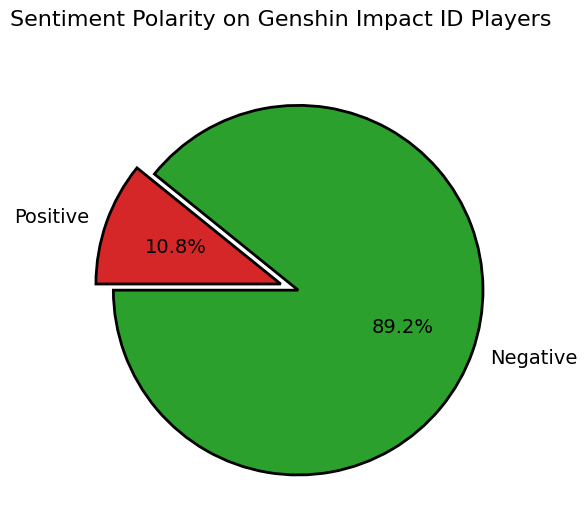

In [21]:
fig, ax = plt.subplots(figsize=(6, 6))

sizes = [num for num in df_cleaned['polarity'].value_counts()]
labels = {"Positive", "Negative"}
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%',
       explode=(0.1, 0), textprops={'fontsize': 14},
       startangle = 180, colors = ['tab:green', 'tab:red'],
       wedgeprops = {'edgecolor': 'black', 'linewidth' : 2})
ax.set_title('Sentiment Polarity on Genshin Impact ID Players', fontsize=16, pad=20)
plt.show()

In [22]:
#wordclouds
pd.set_option('display.max_colwidth', 3000)

def twt(polarity):
  pol_twt = df_cleaned[df_cleaned['polarity'] == polarity]
  pol_twt = pol_twt[['final_content', 'score_polarity', 'polarity', 'stopwords_content']]
  pol_twt = pol_twt.sort_values(by=['score_polarity'], ascending=False)
  pol_twt = pol_twt.reset_index(drop=True)
  pol_twt.index +=1

  return pol_twt

pos_twt = twt("positive")
neg_twt = twt("negative")


In [23]:
def wordcloud(twt, typed):
  list_words = ''
  for tweet in twt['stopwords_content']:
    for word in tweet:
      list_words += ' '+ (word)

  wordcloud = WordCloud(width =800, height = 500, background_color = "black",
                        min_font_size=10).generate(list_words)
  fig,ax = plt.subplots(figsize=(10,10))
  ax.set_title(f'Word Cloud of {typed}  Data', fontsize=18)
  ax.grid(False)
  ax.imshow((wordcloud))
  fig.tight_layout(pad=0)
  ax.axis('off')
  plt.show()


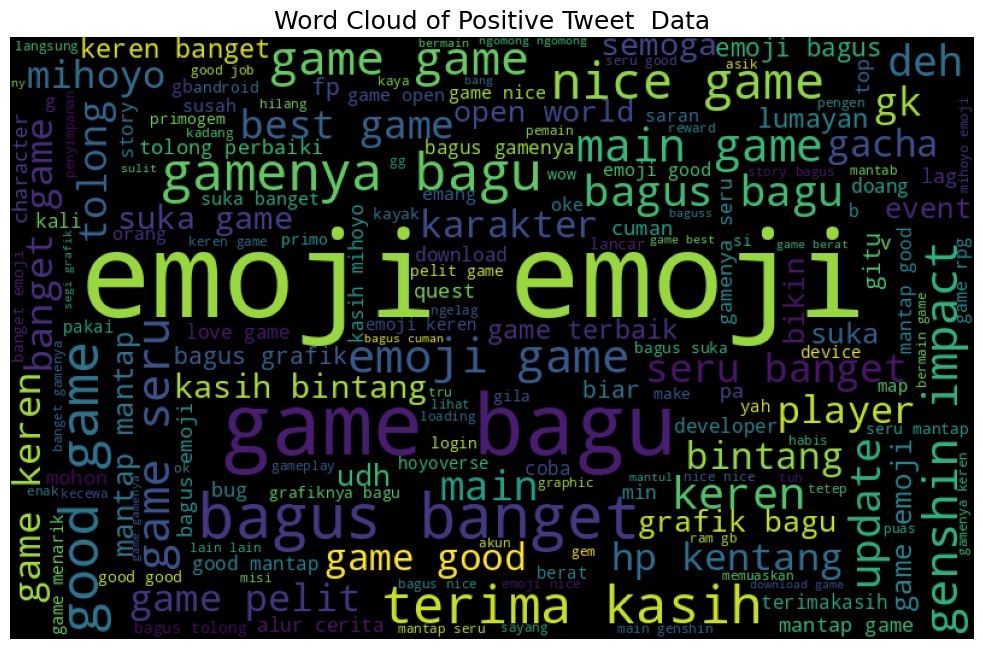

In [24]:
wordcloud(pos_twt, "Positive Tweet")

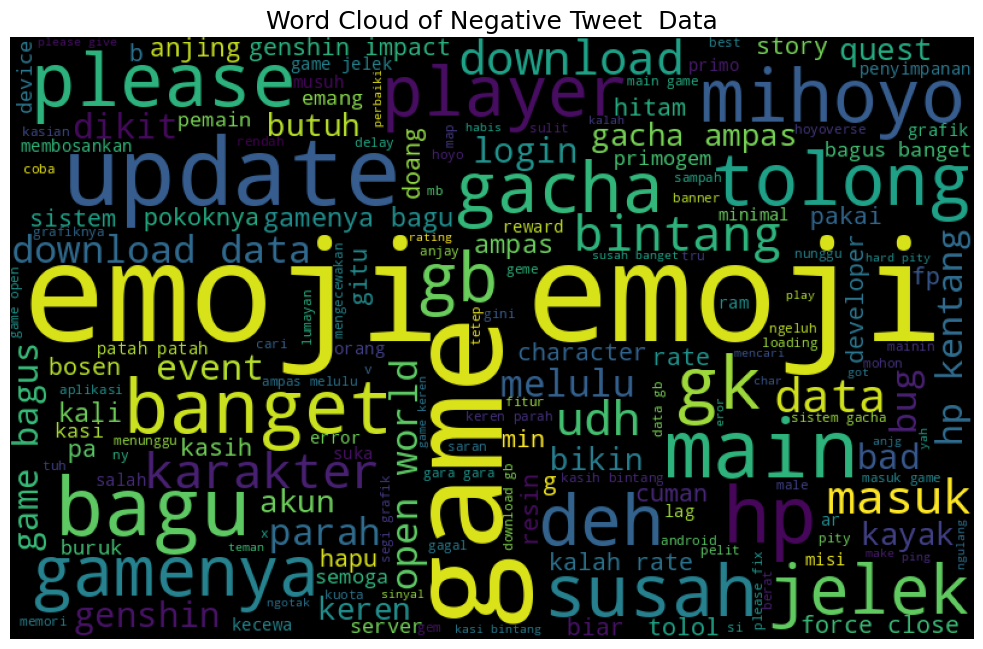

In [25]:
wordcloud(neg_twt, "Negative Tweet")

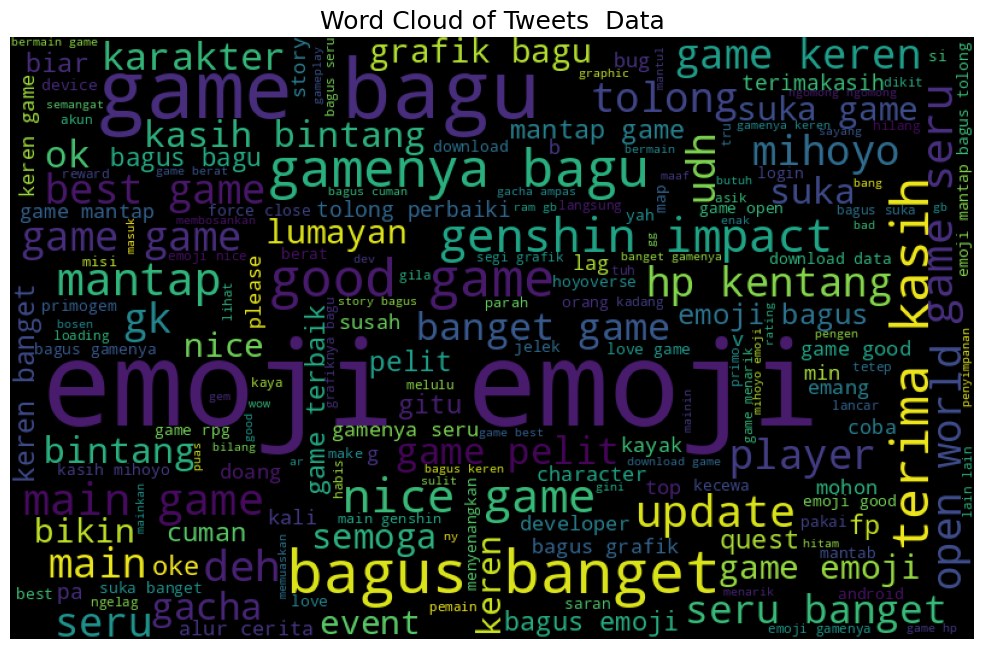

In [26]:
wordcloud(df_cleaned, "Tweets")

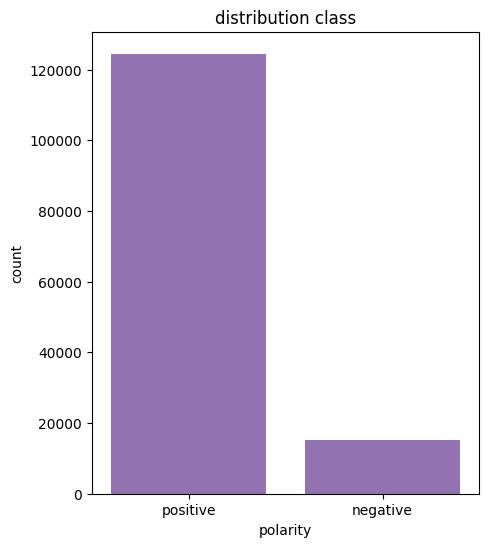

In [27]:
plt.figure(figsize=(5,6))

#distribution
dist = sns.countplot(x = 'polarity', data = df_cleaned, color='tab:purple')
plt.title('distribution class')
plt.show()

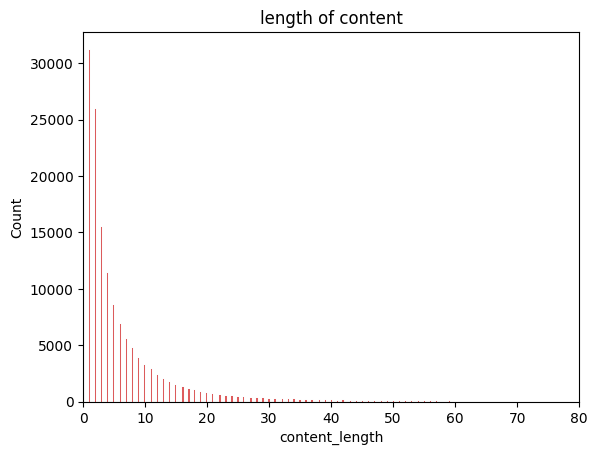

In [28]:
#length of content
df_cleaned['content_length'] = df_cleaned['final_content'].apply(lambda x : len(x.split()))
sns.histplot(df_cleaned['content_length'], color="tab:red")
plt.title('length of content')
plt.xlim(0,80)
plt.show()

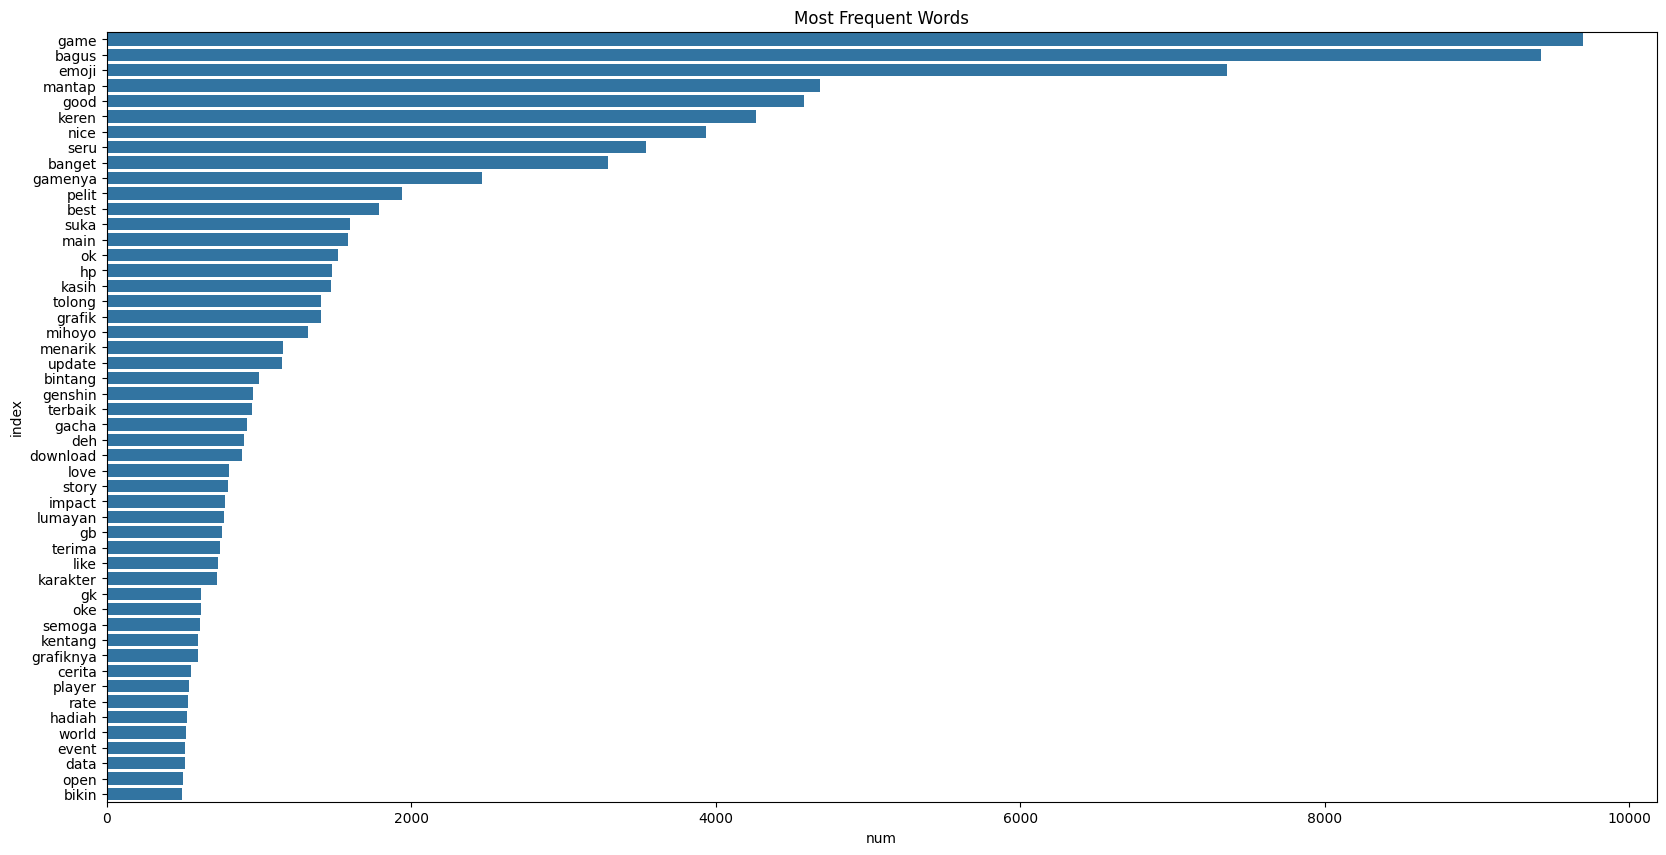

In [29]:
#frequent words
plt.figure(figsize=(20, 10))
vectorize = TfidfVectorizer()
x = vectorize.fit_transform(df_cleaned['final_content'])
tfidf_df = pd.DataFrame(x.toarray(), columns=vectorize.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='num')
tfidf_df = tfidf_df.sort_values('num', ascending=False).head(50)
sns.barplot(x='num', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

In [30]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139583 entries, 4 to 216053
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              139583 non-null  object        
 1   userName              139583 non-null  object        
 2   content               139583 non-null  object        
 3   score                 139583 non-null  int64         
 4   thumbsUpCount         139583 non-null  int64         
 5   reviewCreatedVersion  139583 non-null  object        
 6   at                    139583 non-null  datetime64[ns]
 7   appVersion            139583 non-null  object        
 8   cleaned_content       139583 non-null  object        
 9   cleaned_lowercase     139583 non-null  object        
 10  slangwords_content    139583 non-null  object        
 11  tokenized_content     139583 non-null  object        
 12  stopwords_content     139583 non-null  object        
 13  fina

In [31]:
df_cleaned.describe()

,score,thumbsUpCount,at,score_polarity,content_length
count,139583.000000,139583.000000,139583,139583.000000,139583.000000
mean,4.387647,2.152662,2022-04-16 18:03:11.581338368,3.543777,5.891856
min,1.000000,0.000000,2020-09-27 04:26:49,-39.000000,0.000000
25%,5.000000,0.000000,2021-03-17 15:58:54,0.000000,2.000000
50%,5.000000,0.000000,2021-10-14 06:51:17,3.000000,3.000000
75%,5.000000,0.000000,2023-04-12 02:31:40.500000,6.000000,7.000000
max,5.000000,5592.000000,2025-04-07 02:30:26,117.000000,500.000000
std,1.296844,31.118567,NaN,5.404785,7.251686


In [35]:
df_cleaned.isna().sum()

,0
reviewId,0
userName,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,0
at,0
appVersion,0
cleaned_content,0
cleaned_lowercase,0


In [32]:
df_cleaned.to_csv('genshin_sentiment_cleaned.csv', index='False')

In [36]:
from google.colab import drive
drive.mount('/content/drive')

out_path = '/content/drive/My Drive/sentimentDatasets/genshin_sentiment_cleaned.csv'
df_cleaned.to_csv(out_path, index='False')

Mounted at /content/drive
